In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sympy import *

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'Data.csv'), sep=',', header=None)
print(data.head())

             0                  1                         2   \
0  Data Point #  Motor Speed [RPM]  Manometer delta P [dpsi]   
1      1.00E+00           4.00E+02                  5.78E-03   
2      2.00E+00           5.00E+02                  9.03E-03   
3      3.00E+00           6.00E+02                  1.30E-02   
4      4.00E+00           7.00E+02                  1.84E-02   

                 3                      4                      5   \
0  Ambient Temp.[R]  Viscosity [slug/ft s]  Ambient Press. [psia]   
1          5.31E+02               3.81E-07               1.41E+01   
2          5.32E+02               3.81E-07               1.41E+01   
3          5.32E+02               3.81E-07               1.41E+01   
4          5.33E+02               3.82E-07               1.41E+01   

                                 6              7              8   \
0  Omega Transmitter delta P [dpsi]  RakeT1 [psid]  RakeT2 [psid]   
1                          5.51E-03       4.55E-03       4.46E

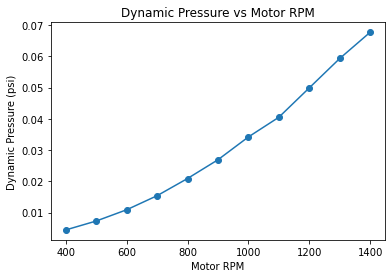

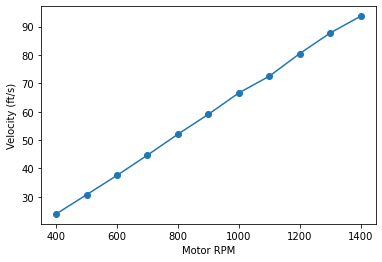

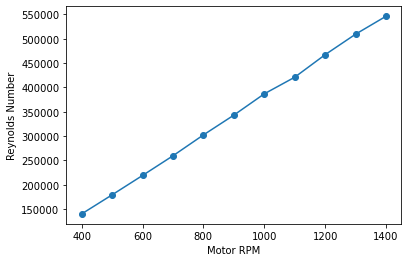

In [3]:
# Graphs for question 2
# Get motor rpm data
rpm = data.iloc[1:, 1]
rpm = rpm.astype(float)

# Actual dynamic pressure vs Motor RPM
q = np.array(data.iloc[1:, -1], dtype=float)
p_0_array = np.array(data.iloc[1:, -3], dtype=float)
p_array = np.array(data.iloc[1:, -2], dtype=float)
plt.figure()
plt.plot(rpm, q, '-o')
plt.xlabel('Motor RPM')
plt.ylabel('Dynamic Pressure (psi)')
plt.title('Dynamic Pressure vs Motor RPM')

# Actual velocity in the test section vs Motor RPM
p = np.array(data.iloc[1:, 5], dtype=float)
T = np.array(data.iloc[1:, 3], dtype=float)
R = 1717*12 # in lbf/lb R
rho = p/(R*T)*(12**3) # lb/ft^3
v = np.sqrt(2*q*144/(rho))

plt.figure()
plt.plot(rpm, v, '-o')
plt.xlabel('Motor RPM')
plt.ylabel('Velocity (ft/s)')

# Reynolds number vs Motor RPM
mu = np.array(data.iloc[1:, 4], dtype=float)
Re = rho*v/mu
plt.figure()
plt.plot(rpm, Re, '-o')
plt.xlabel('Motor RPM')
plt.ylabel('Reynolds Number')
plt.show(

)# MachMach number vs Motor RPM
M = v/np.sqrt(1.4*1717*T)
# plt.figure()
#     plt.plo)plt.xlabel('Motor RPM'plt.ylabel('Mach Number')# )

Pitot Tube 1:
0.46118137874997983
0.7407407407407277
Pitot Tube 2:
-0.6887835173353093
-0.24691358024692064
Pitot Tube 3:
-0.5919412617032999
-0.24691358024692064
Pitot Tube 4:
0.11645522326000267
1.7977528089887689
Pitot Tube 5:
0.6413624715846713
1.5730337078651824
Pitot Tube 6:
1.1156536447882035
1.5730337078651824
Pitot Tube 7:
-0.5776603018094592
-0.1369863013698693
Pitot Tube 8:
-0.45419442402745464
0.0
Pitot Tube 9:
-0.7006287617325779
0.4109589041095842


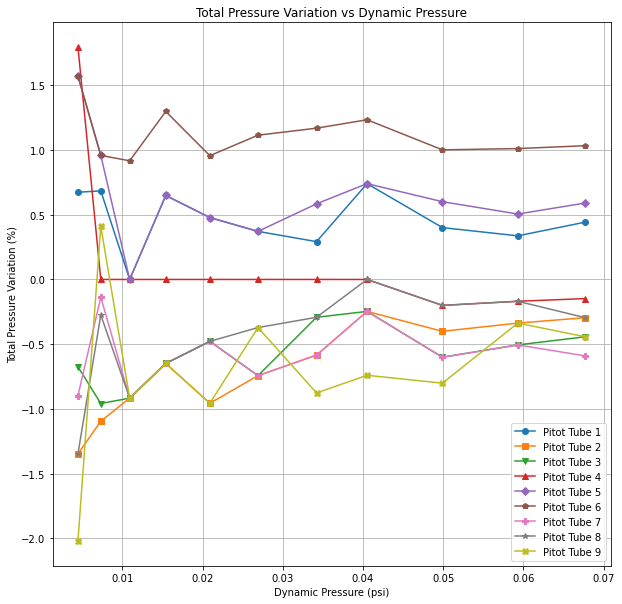

In [4]:
# Question 3
plt.figure(figsize=(10, 10))
markers = ['o', 's', 'v', '^', 'D', 'p', 'P', '*', 'X']
for i in range(9):
    p0 = np.array(data.iloc[1:, 7+i], dtype=float)
    p_avg = np.array(data.iloc[1:, 21], dtype=float)
    TPV = 100*(p0-p_avg)/q
    plt.plot(q, TPV, markers[i]+'-', label='Pitot Tube {}'.format(i+1))
    print('Pitot Tube {}:'.format(i+1))
    print(np.mean(TPV))
    print(np.max(TPV))
plt.xlabel('Dynamic Pressure (psi)')
plt.ylabel('Total Pressure Variation (%)')
plt.title('Total Pressure Variation vs Dynamic Pressure')
plt.grid()
plt.legend()

plt.show()

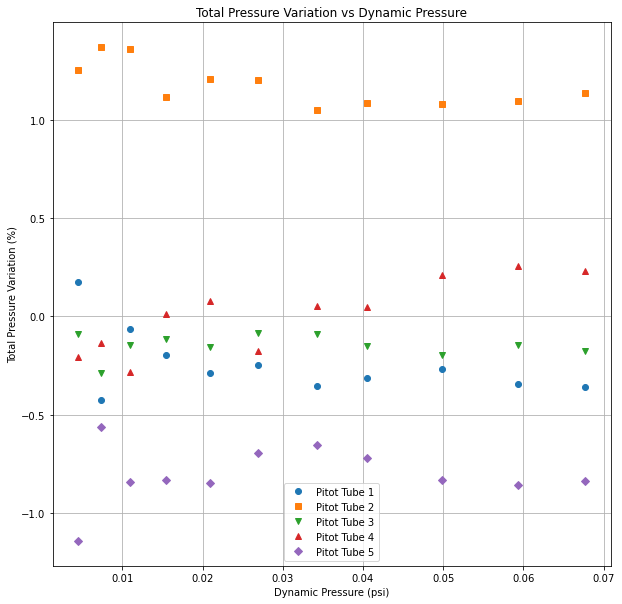

In [5]:
# Question 4
plt.figure(figsize=(10, 10))
markers = ['o', 's', 'v', '^', 'D', 'p', 'P', '*', 'X']
for i in range(5):
    p0 = np.array(data.iloc[1:, 16+i], dtype=float)
    p_avg = np.array(data.iloc[1:, 22], dtype=float)
    SPV = 100*(p0-p_avg)/q
    plt.plot(q, SPV, markers[i], label='Pitot Tube {}'.format(i+1))
plt.xlabel('Dynamic Pressure (psi)')
plt.ylabel('Total Pressure Variation (%)')
plt.title('Total Pressure Variation vs Dynamic Pressure')
plt.grid()
plt.legend()
plt.show()

In [6]:
pressure_uncertainty = .727 #psi
temp_uncertainty = 1.8 #F
rho_uncertainty = np.sqrt((1/(R*T)*pressure_uncertainty)**2 + p/(R*T**2)*temp_uncertainty**2)

PSI_uncertainity = 1 #psi
static_pressure_uncertainty = np.sqrt(5*(1/5*PSI_uncertainity)**2)
total_pressure_uncertainty = np.sqrt(9*(1/9*PSI_uncertainity)**2)

p0, p, rho_var = var('p_0, p, rho')
v = sqrt((p-p0)/rho)
dvdp = diff(v, p)
dvdp0 = diff(v, p0)
dvdrho = diff(v, rho_var)

v_uncertainty = np.sqrt((()*rho_uncertainty)**2 + (()*static_pressure_uncertainty)**2 + (()*total_pressure_uncertainty)**2)



In [7]:
dvdp

sqrt((p - p_0)/rho)/(2*(p - p_0))